In [1]:
from pyautoml import Clean, Preprocess, Feature, Model
import pandas as pd
%matplotlib inline

train_data = pd.read_csv('data/train.csv')

Loading BokehJS ...

In [2]:
clean = Clean(data=train_data, target_field='Survived', report_name='Titanic')

In [3]:
# clean.data_report(title='Titanic Summary', output_file='titanic_summary.html')

## Cleaning

In [4]:
clean.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,712,712,712,NaN,NaN,567,712,712,NaN,712,NaN,NaN
mean,444.83,0.377809,2.32865,NaN,NaN,29.393,0.54073,0.390449,NaN,32.9896,NaN,NaN
std,258.229,0.48518,0.83109,NaN,NaN,14.444,1.13431,0.829701,NaN,53.4007,NaN,NaN
min,1,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,219.75,0,2,NaN,NaN,20,0,0,NaN,7.8958,NaN,NaN
50%,444.5,0,3,NaN,NaN,28,0,0,NaN,13.825,NaN,NaN
75%,663.5,1,3,NaN,NaN,38,1,0,NaN,31.275,NaN,NaN
max,891,1,3,NaN,NaN,74,8,6,NaN,512.329,NaN,NaN
counts,712,712,712,712,712,567,712,712,712,712,156,710
uniques,712,2,3,712,2,85,7,7,571,232,121,3


In [5]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,712,712,712,712,712,567,712,712,712,712,156,710
uniques,712,2,3,712,2,85,7,7,571,232,121,3
missing,0,0,0,0,0,145,0,0,0,0,556,2
missing_perc,0%,0%,0%,0%,0%,20.37%,0%,0%,0%,0%,78.09%,0.28%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


mean                        32.9896
std                         53.4007
variance                    2851.63
min                               0
max                         512.329
mode                           8.05
5%                            7.125
25%                          7.8958
50%                          13.825
75%                          31.275
95%                             120
iqr                         23.3792
kurtosis                    30.6557
skewness                    4.68241
sum                         23488.6
mad                         29.9123
cv                          1.61871
zeros_num                        14
zeros_perc                    1.97%
deviating_of_mean                19
deviating_of_mean_perc        2.67%
deviating_of_median              48
deviating_of_median_perc      6.74%
top_correlations                   
counts                          712
uniques                         232
missing                           0
missing_perc                

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


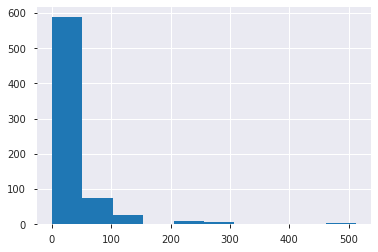

In [6]:
clean.describe_column('Fare')

32.98962963483146

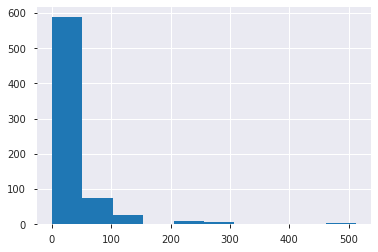

In [7]:
clean.describe_column('Fare')['mean']

In [8]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,556.000000,145.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.780899,0.203652,0.002809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,131.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.731844,0.178771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
iter1 = clean.replace_missing_mostcommon('Fare', 'Embarked')

In [10]:
iter1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,D20,78.2667,C
1,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,NaN,7.2292,C
2,590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,NaN,8.05,S
3,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,NaN,7.05,S
4,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,F2,26,S


In [11]:
iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,556.000000,145.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.780899,0.203652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,131.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.731844,0.178771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


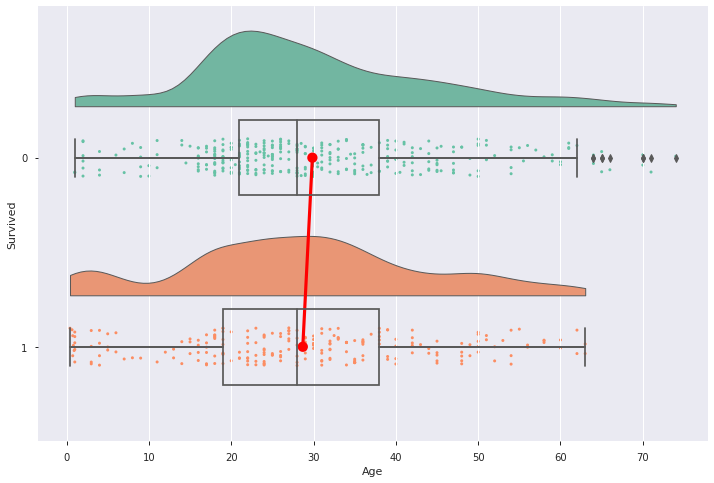

In [12]:
clean.visualize_raincloud('Age')

In [13]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,556.000000,145.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.780899,0.203652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,131.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.731844,0.178771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
clean.replace_missing_random_discrete('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,D20,78.2667,C
1,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,NaN,7.2292,C
2,590,0,3,"Murdlin, Mr. Joseph",male,27.0,0,0,A./5. 3235,NaN,8.05,S
3,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,NaN,7.05,S
4,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,F2,26,S


In [15]:
clean.missing_values

,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,556.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.780899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,131.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.731844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
## Proving iter1 is a completely separate instance

iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,556.000000,145.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.780899,0.203652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,131.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.731844,0.178771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
clean.visualize_barplot('Age', 'Survived', groupby='Age', method='mean', xlabel='Age')

In [18]:
clean.drop('Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,C
1,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,C
2,590,0,3,"Murdlin, Mr. Joseph",male,27.0,0,0,A./5. 3235,8.05,S
3,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.05,S
4,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26,S


In [19]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
counts,712,712,712,712,712,712,712,712,712,712,712
uniques,712,2,3,712,2,85,7,7,571,232,3
missing,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,categorical,categorical


In [20]:
clean.visualize_scatterplot('Age', 'Fare', fill_color='yellow')

## Feature Engineering

In [21]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Nobel",
                    "Don":        "Nobel",
                    "Sir" :       "Nobel",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Nobel",
                    "Dona":       "Nobel",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Nobel"
                    } 

feature = Feature(clean)

In [22]:
feature.apply(lambda x: Title_Dictionary[x['Name'].split(',')[1].split('.')[0].strip()], 'Title')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,C,Mrs
1,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,C,Mr
2,590,0,3,"Murdlin, Mr. Joseph",male,27.0,0,0,A./5. 3235,8.0500,S,Mr
3,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,Mr
4,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,S,Mr


In [23]:
feature['FamilySize'] = ( feature['SibSp'] + feature['Parch'],
                         feature.test_data['SibSp'] + feature.test_data['SibSp'] )

In [24]:
feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,C,Mrs,1
1,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,C,Mr,0
2,590,0,3,"Murdlin, Mr. Joseph",male,27.0,0,0,A./5. 3235,8.0500,S,Mr,0
3,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,Mr,0
4,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,S,Mr,2


In [25]:
## Can still do apply and it will apply to both train and test dataset.

def get_person(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    return 'child' if age < 16 else sex

feature.apply(get_person, 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,C,Mrs,1,female
1,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,C,Mr,0,male
2,590,0,3,"Murdlin, Mr. Joseph",male,27.0,0,0,A./5. 3235,8.0500,S,Mr,0,male
3,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,Mr,0,male
4,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,S,Mr,2,male


In [26]:
## Can still do lambda.

feature.apply(lambda x: 'child' if x['Age'] < 16 else x['Sex'], 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,C,Mrs,1,female
1,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,C,Mr,0,male
2,590,0,3,"Murdlin, Mr. Joseph",male,27.0,0,0,A./5. 3235,8.0500,S,Mr,0,male
3,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,Mr,0,male
4,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,S,Mr,2,male


In [27]:
feature.drop('Name', 'Ticket', 'SibSp', 'Parch', 'Sex', 'PassengerId')

,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person
0,1,1,52.0,78.2667,C,Mrs,1,female
1,0,3,28.5,7.2292,C,Mr,0,male
2,0,3,27.0,8.0500,S,Mr,0,male
3,0,3,25.0,7.0500,S,Mr,0,male
4,0,2,36.5,26.0000,S,Mr,2,male


In [28]:
feature.onehot_encode('Person', 'Embarked', 'Title', 'Pclass', keep_col=False)

,Survived,Age,Fare,FamilySize,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_1,Pclass_2,Pclass_3
0,1,52.0,78.2667,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,28.5,7.2292,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,27.0,8.0500,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,25.0,7.0500,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,36.5,26.0000,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modelling

In [29]:
model = Model(feature)

In [30]:
model.logistic_regression()

/home/sidha62/.virtualenvs/pyautoml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
model.list_models()

######## QUEUED MODELS ########
No queued models.

######### RAN MODELS ##########
log_reg


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


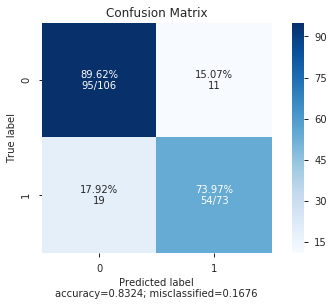

In [32]:
model.log_reg.confusion_matrix(hide_counts=False)